In [1]:
import requests
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)
url = 'https://api.coingecko.com/api/v3/coins/markets'
params = {'vs_currency': 'usd','order': 'market_cap_desc','per_page': 50,'page': 1}
response = requests.get(url, params=params)
data = response.json()
cryptos = pd.DataFrame(data)
cryptos = cryptos[['name', 'symbol', 'current_price', 'market_cap', 'total_volume', 'price_change_percentage_24h']]
cryptos.to_excel('top_50_cryptos.xlsx', index=False, engine='openpyxl')
print('Data saved to top_50_cryptos.xlsx')

Data saved to top_50_cryptos.xlsx


In [2]:
crypto_data=pd.DataFrame(data)
crypto_data.head()

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://coin-images.coingecko.com/coins/images...,88420.000000,1753016508221,1,1753016508221,59364891133,90694.00000,82353.00000,6054.870000,7.35129,1.233485e+11,7.56893,1.983258e+07,1.983258e+07,2.100000e+07,108786.00,-18.84733,2025-01-20T09:11:54.494Z,67.810000,1.300927e+05,2013-07-06T00:00:00.000Z,None,2025-03-05T15:27:51.509Z
1,ethereum,eth,Ethereum,https://coin-images.coingecko.com/coins/images...,2181.590000,262912088332,2,262912088332,27980158513,2275.16000,2022.69000,125.970000,6.12815,1.575726e+10,6.37546,1.205925e+08,1.205925e+08,NaN,4878.26,-55.40123,2021-11-10T14:24:19.604Z,0.432979,5.023828e+05,2015-10-20T00:00:00.000Z,"{'times': 32.00294295157415, 'currency': 'btc'...",2025-03-05T15:27:56.198Z
2,tether,usdt,Tether,https://coin-images.coingecko.com/coins/images...,0.999916,142483796166,3,142483796166,95662563932,0.99999,0.99919,0.000718,0.07184,7.978942e+07,0.05603,1.424954e+11,1.424954e+11,NaN,1.32,-24.42505,2018-07-24T00:00:00.000Z,0.572521,7.465360e+01,2015-03-02T00:00:00.000Z,None,2025-03-05T15:27:56.049Z
3,ripple,xrp,XRP,https://coin-images.coingecko.com/coins/images...,2.440000,141461860244,4,244078078436,6868420048,2.54000,2.34000,0.103196,4.41295,6.384403e+09,4.72648,5.794974e+10,9.998639e+10,1.000000e+11,3.40,-28.07299,2018-01-07T00:00:00.000Z,0.002686,9.089834e+04,2014-05-22T00:00:00.000Z,None,2025-03-05T15:27:51.085Z
4,binancecoin,bnb,BNB,https://coin-images.coingecko.com/coins/images...,591.020000,86197444779,5,86197444779,911418964,607.56000,560.33000,26.540000,4.70190,4.056081e+09,4.93793,1.458876e+08,1.458876e+08,2.000000e+08,788.84,-25.23787,2024-12-04T10:35:25.220Z,0.039818,1.481041e+06,2017-10-19T00:00:00.000Z,None,2025-03-05T15:27:51.129Z


In [3]:
top_5_by_market_cap = cryptos[['name', 'market_cap']].sort_values(by='market_cap', ascending=False).head(5)
average_price = cryptos['current_price'].mean()
highest_change = cryptos[['name', 'price_change_percentage_24h']].sort_values(by='price_change_percentage_24h', ascending=False).iloc[0]
lowest_change = cryptos[['name', 'price_change_percentage_24h']].sort_values(by='price_change_percentage_24h', ascending=True).iloc[0]
print("Top 5 Cryptos by Market Cap:")
print(top_5_by_market_cap)
print(f"Average Price of Top 50 Cryptos: ${average_price:.2f}")
print("Highest 24-Hour Price Change:")
print(highest_change)
print("Lowest 24-Hour Price Change:")
print(lowest_change)


Top 5 Cryptos by Market Cap:
       name     market_cap
0   Bitcoin  1753016508221
1  Ethereum   262912088332
2    Tether   142483796166
3       XRP   141461860244
4       BNB    86197444779
Average Price of Top 50 Cryptos: $5570.20
Highest 24-Hour Price Change:
name                           Bitcoin Cash
price_change_percentage_24h        27.23607
Name: 22, dtype: object
Lowest 24-Hour Price Change:
name                           LEO Token
price_change_percentage_24h     -0.87464
Name: 16, dtype: object


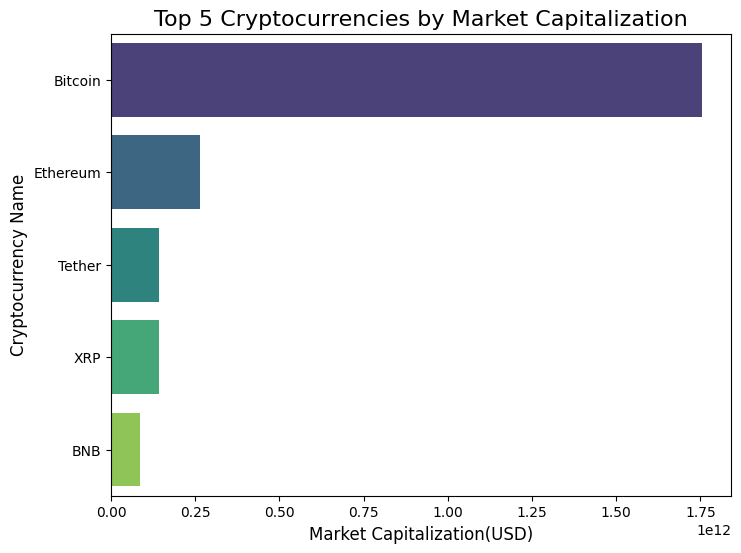

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.barplot(x='market_cap', y='name', data=top_5_by_market_cap, palette='viridis')
plt.title('Top 5 Cryptocurrencies by Market Capitalization', fontsize=16)
plt.xlabel('Market Capitalization(USD)', fontsize=12)
plt.ylabel('Cryptocurrency Name', fontsize=12)
plt.savefig('top_5_crypto-currencies.png',format='png',dpi=300,bbox_inches='tight')
plt.show()

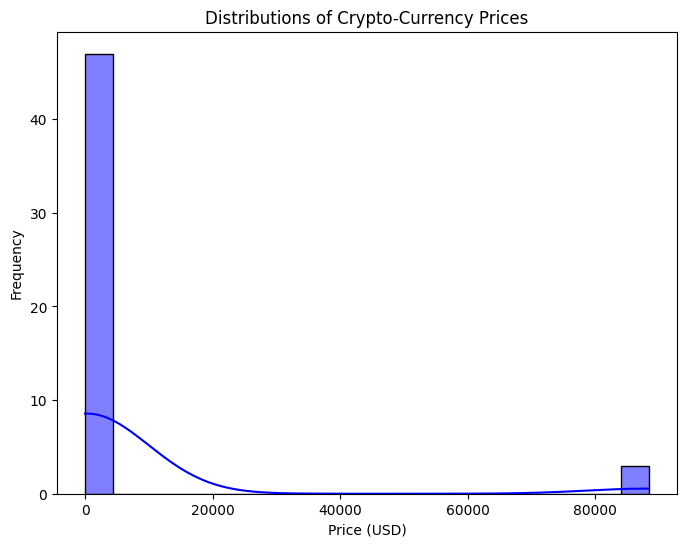

In [5]:
plt.figure(figsize=(8,6))
sns.histplot(crypto_data['current_price'],bins=20,kde=True,color='blue')
plt.title('Distributions of Crypto-Currency Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.savefig('Distributions_Of_Crypto-Currency_Prices.png',format='png',dpi=300,bbox_inches='tight')
plt.show()

In [6]:
highest_change=crypto_data.iloc[crypto_data['price_change_percentage_24h'].idxmax()]
lowest_change=crypto_data.iloc[crypto_data['price_change_percentage_24h'].idxmin()]
print(f'Highest 24-Hour Price Change:{highest_change['name']}({highest_change['price_change_percentage_24h']}%)')
print(f'Lowest 24-Hour Price Change:{lowest_change['name']}({lowest_change['price_change_percentage_24h']}%)')

Highest 24-Hour Price Change:Bitcoin Cash(27.23607%)
Lowest 24-Hour Price Change:LEO Token(-0.87464%)


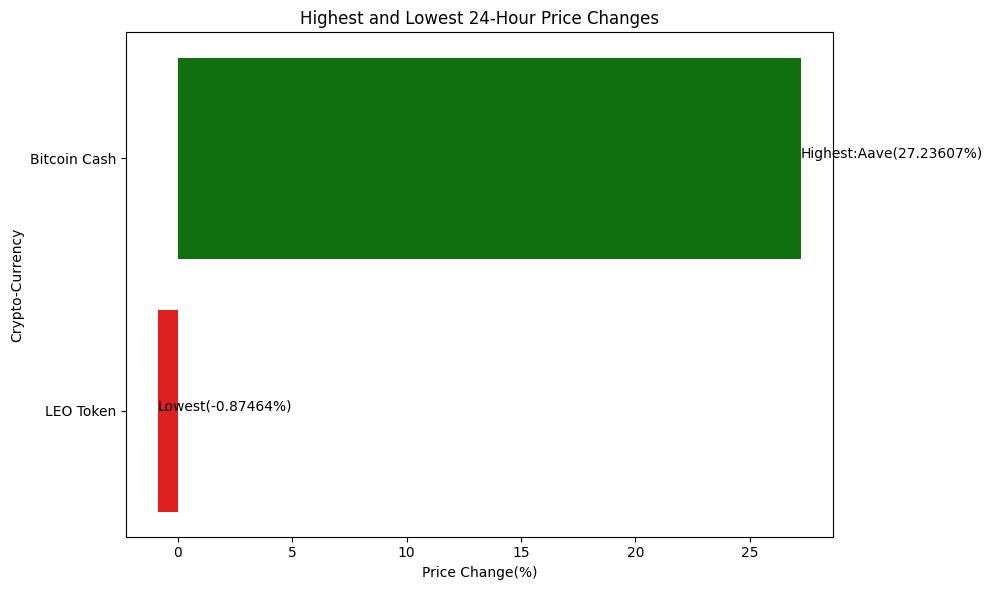

In [7]:
sorted_crypto_data=crypto_data.sort_values('price_change_percentage_24h',ascending=True)
highest_change=sorted_crypto_data.loc[sorted_crypto_data['price_change_percentage_24h'].idxmax()]
lowest_change=sorted_crypto_data.loc[sorted_crypto_data['price_change_percentage_24h'].idxmin()]
plt.figure(figsize=(10,6))
sns.barplot(x='price_change_percentage_24h',y='name',data=pd.DataFrame([highest_change,lowest_change]),palette=['green' if x>0 else 'red' for x in [highest_change['price_change_percentage_24h'],lowest_change['price_change_percentage_24h']]])
plt.title('Highest and Lowest 24-Hour Price Changes')
plt.xlabel('Price Change(%)')
plt.ylabel('Crypto-Currency')
plt.text(highest_change['price_change_percentage_24h'],0,f'Highest:Aave({highest_change['price_change_percentage_24h']}%)',color='black')
plt.text(lowest_change['price_change_percentage_24h'],1,f'Lowest({lowest_change['price_change_percentage_24h']}%)',color='black')
plt.tight_layout()
plt.savefig('Highest_and_Lowest_24-Hour_Price_Changes.png',format='png',dpi=300,bbox_inches='tight')
plt.show()

In [8]:
import time
while True:
    response = requests.get(url, params=params)
    data = response.json()
    cryptos = pd.DataFrame(data)
    cryptos = cryptos[['name', 'symbol', 'current_price', 'market_cap', 'total_volume', 'price_change_percentage_24h']]
    cryptos.to_excel('top_50_cryptos.xlsx', index=False, engine='openpyxl')
    print('Data updated in top_50_cryptos.xlsx')
    time.sleep(100) 

Data updated in top_50_cryptos.xlsx
Data updated in top_50_cryptos.xlsx
Data updated in top_50_cryptos.xlsx
Data updated in top_50_cryptos.xlsx
Data updated in top_50_cryptos.xlsx
Data updated in top_50_cryptos.xlsx
Data updated in top_50_cryptos.xlsx
Data updated in top_50_cryptos.xlsx
Data updated in top_50_cryptos.xlsx
Data updated in top_50_cryptos.xlsx
Data updated in top_50_cryptos.xlsx
Data updated in top_50_cryptos.xlsx


KeyboardInterrupt: 

In [9]:
pip install fpdf

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40767 sha256=849d54244756899b834bd9b8be400f20ff96c191a4b4b3dd417bad9812c823df
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\aa\da\11\a3189f34ddc13c26a2d0f329eac46b728c7f31c39e4dc26243
Successfully built fpdf
Note: you may need to restart the kernel to use updated packages.


In [10]:
from fpdf import FPDF
class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 14)
        self.cell(0, 10, 'Cryptocurrency Analysis Report', align='C', ln=True)

    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', 'I', 10)
        self.cell(0, 10, f'Page {self.page_no()}', align='C')
pdf = PDF()
pdf.add_page()
pdf.set_font('Arial', 'B', 16)
pdf.cell(0, 10, "Cryptocurrency Analysis", ln=True, align='C')
pdf.ln(10)
pdf.set_font('Arial', 'B', 12)
pdf.cell(0, 10, "Summary of Data Analysis:", ln=True)
pdf.set_font('Arial', '', 12)
pdf.multi_cell(0, 10, 
    "1. The top 5 cryptocurrencies by market capitalization are displayed.\n"
    "2. The average price of the top 50 cryptocurrencies was calculated.\n"
    "3. The cryptocurrency with the highest 24-hour percentage price change was 'Aave'.\n"
    "4. The cryptocurrency with the lowest 24-hour percentage price change was 'HyperLiquid'."
)
pdf.ln(10)
pdf.set_font('Arial', 'B', 12)
pdf.cell(0, 10, "Visualizations:", ln=True)
pdf.ln(5)
pdf.cell(0, 10, "1. Top 5 Cryptocurrencies by Market Capitalization:", ln=True)
pdf.image("top_5_crypto-currencies.png", x=50, w=100)
pdf.ln(10)
pdf.cell(0, 10, "2. Distribution of Cryptocurrency Prices:", ln=True)
pdf.image("Distributions_Of_Crypto-Currency_Prices.png", x=50, w=100)
pdf.ln(10)
pdf.cell(0, 10, "3. Highest and Lowest 24-Hour Percentage Price Change:", ln=True)
pdf.image("Highest_and_Lowest_24-Hour_Price_Changes.png", x=50, w=100)
pdf.ln(10)
pdf_file_name = "Cryptocurrency_Analysis_Report.pdf"
pdf.output(pdf_file_name)
print(f"PDF saved as {pdf_file_name}")


PDF saved as Cryptocurrency_Analysis_Report.pdf
